In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder as One
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import pickle

In [2]:
df = pd.read_csv('./Avalanche.csv')
df.head()

,Slope,Forest Density,Snow Density,Air Temperature,Wind,Prediction
0,59,H,52,-17,19,2
1,24,L,23,-8,19,0
2,15,H,30,7,19,0
3,27,L,61,-13,25,1
4,34,H,4,-20,7,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Slope            204 non-null    int64 
 1   Forest Density   204 non-null    object
 2   Snow Density     204 non-null    int64 
 3   Air Temperature  204 non-null    int64 
 4   Wind             204 non-null    int64 
 5   Prediction       204 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 9.7+ KB


In [4]:
df.describe()

,Slope,Snow Density,Air Temperature,Wind,Prediction
count,204.000000,204.000000,204.000000,204.000000,204.000000
mean,44.024510,39.553922,-9.289216,22.411765,1.049020
std,19.045044,24.485082,15.023452,11.815789,0.773673
min,12.000000,1.000000,-34.000000,6.000000,0.000000
25%,33.000000,16.000000,-22.000000,11.000000,0.000000
50%,36.000000,42.000000,-10.500000,22.000000,1.000000
75%,59.000000,61.000000,6.000000,35.000000,2.000000
max,80.000000,78.000000,15.000000,40.000000,2.000000


### Checking for Null values 

In [5]:
df.isnull().any()

Slope              False
Forest Density     False
Snow Density       False
Air Temperature    False
Wind               False
Prediction         False
dtype: bool

No null values

### Exploratory Data Analysis

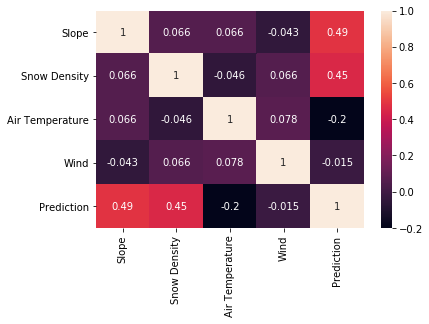

In [6]:
sns.heatmap(df.corr(),annot= True)

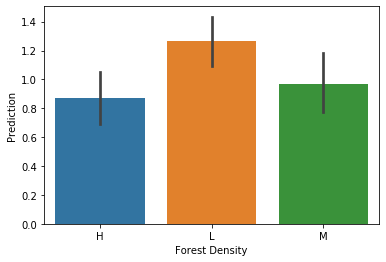

In [7]:
sns.barplot(x='Forest Density',y='Prediction',data=df)

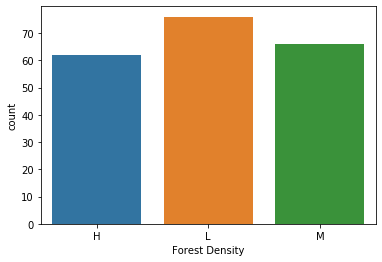

In [8]:
sns.countplot(x='Forest Density',data=df)

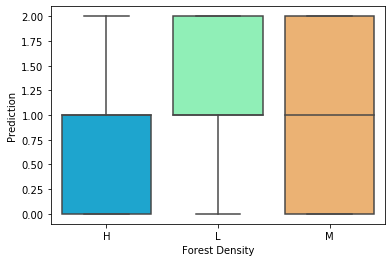

In [9]:
sns.boxplot(x="Forest Density", y="Prediction", data=df,palette='rainbow')

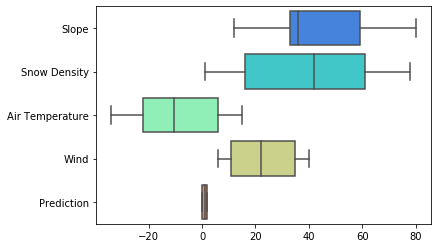

In [10]:
sns.boxplot(data=df,palette='rainbow',orient='h') 

There are no outliers in the data

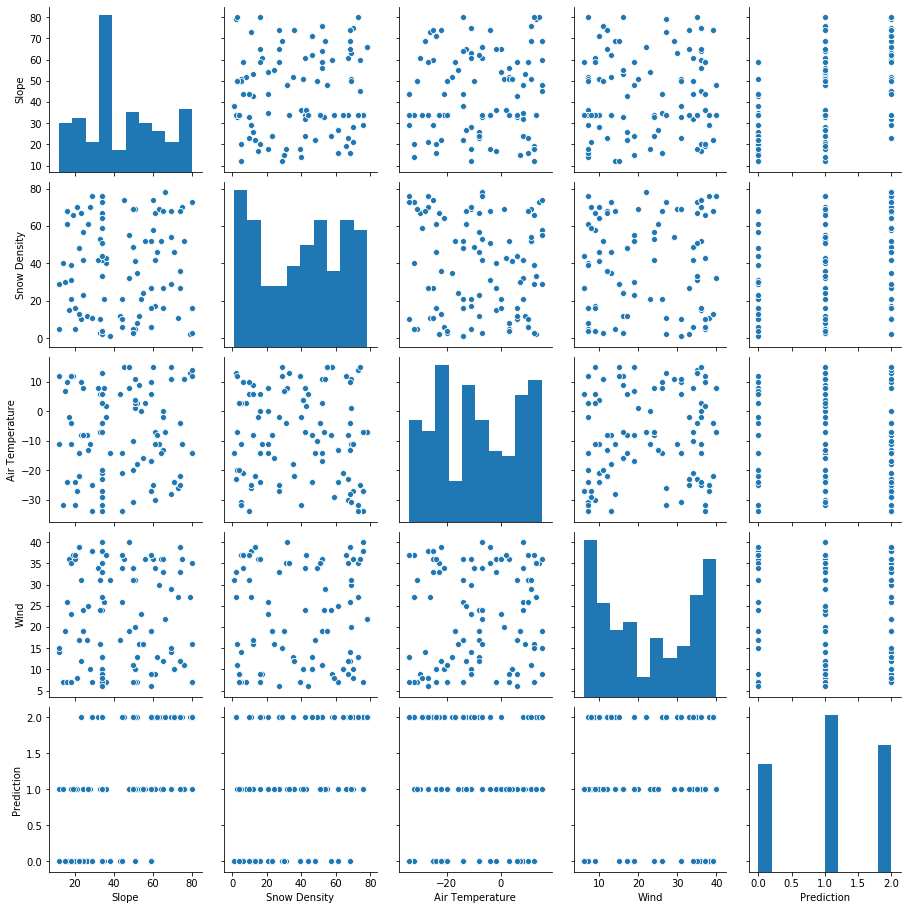

In [11]:
sns.pairplot(df)

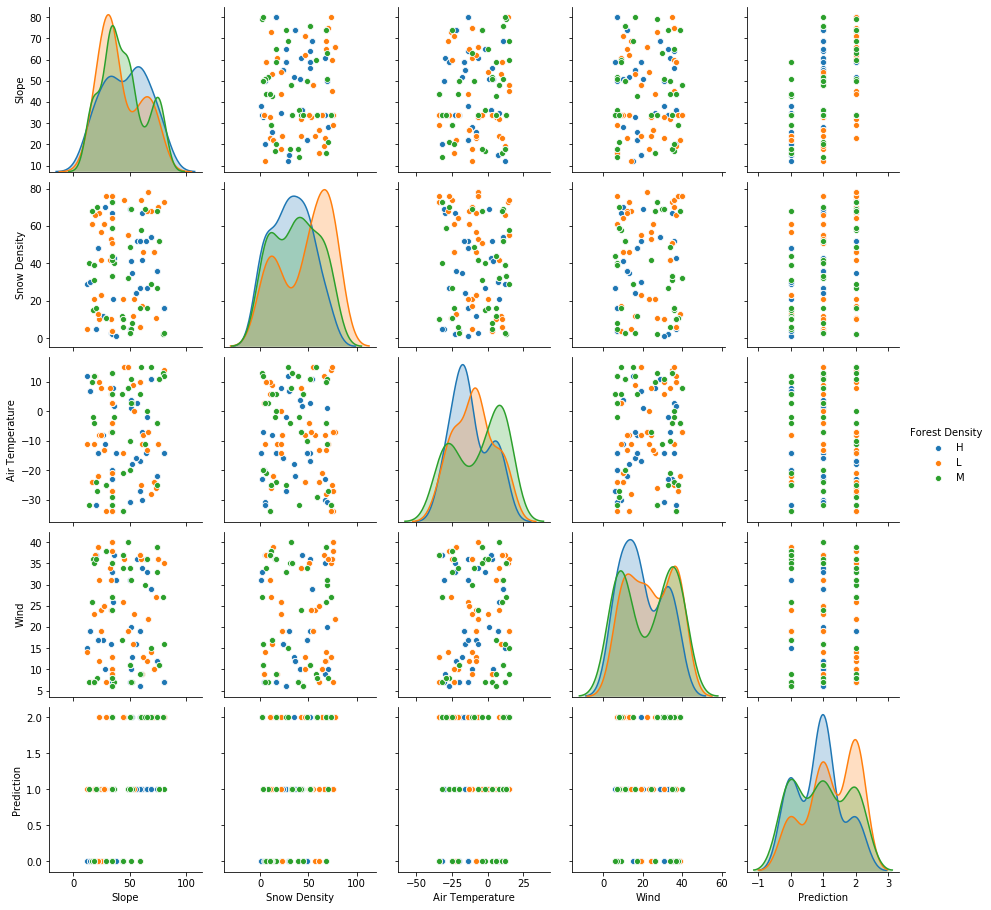

In [12]:
sns.pairplot(df,hue='Forest Density')

### Encoding Categorical Values

In [13]:
ct = ColumnTransformer([('one',One(),[1])],remainder='passthrough')
df = ct.fit_transform(df)
df

array([[  1.,   0.,   0., ..., -17.,  19.,   2.],
       [  0.,   1.,   0., ...,  -8.,  19.,   0.],
       [  1.,   0.,   0., ...,   7.,  19.,   0.],
       ...,
       [  0.,   0.,   1., ...,  13.,  35.,   1.],
       [  0.,   1.,   0., ...,  -4.,  35.,   1.],
       [  0.,   0.,   1., ..., -29.,   8.,   2.]])

### The first variable is an extra variable so we eliminated it

In [14]:
x,y = df[:,1:-1],df[:,-1]
print(x)
print(y)

[[  0.   0.  59.  52. -17.  19.]
 [  1.   0.  24.  23.  -8.  19.]
 [  0.   0.  15.  30.   7.  19.]
 ...
 [  0.   1.  34.  33.  13.  35.]
 [  1.   0.  34.  51.  -4.  35.]
 [  0.   1.  34.  59. -29.   8.]]
[2. 0. 0. 1. 0. 1. 2. 1. 0. 2. 1. 1. 2. 2. 2. 2. 2. 1. 1. 0. 1. 1. 0. 0.
 2. 1. 1. 2. 2. 1. 1. 2. 1. 2. 0. 2. 1. 2. 2. 2. 1. 2. 1. 2. 1. 0. 1. 2.
 0. 1. 2. 1. 0. 1. 1. 0. 0. 0. 2. 2. 1. 0. 0. 1. 0. 1. 1. 0. 2. 1. 2. 0.
 1. 1. 2. 0. 2. 0. 0. 1. 1. 2. 1. 2. 1. 1. 1. 0. 2. 0. 1. 1. 1. 2. 2. 1.
 2. 1. 2. 2. 0. 0. 1. 0. 1. 2. 1. 0. 2. 1. 1. 2. 2. 2. 2. 2. 1. 1. 0. 1.
 1. 2. 0. 0. 1. 0. 1. 2. 1. 0. 2. 1. 1. 2. 2. 2. 2. 2. 1. 1. 0. 1. 1. 1.
 0. 0. 0. 2. 2. 1. 0. 0. 1. 0. 1. 1. 0. 2. 1. 2. 0. 1. 1. 2. 0. 2. 2. 1.
 0. 0. 1. 0. 1. 1. 0. 2. 1. 2. 0. 2. 2. 1. 0. 0. 1. 0. 1. 1. 0. 2. 1. 2.
 0. 0. 1. 0. 1. 2. 1. 0. 2. 1. 1. 2.]


In [15]:
z = np.abs(stats.zscore(df))
outliers = np.where(z>3)
outliers

(array([], dtype=int64), array([], dtype=int64))

### Spliting data into train and test data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

### Building a Decsion Tree Model 

In [17]:
dtree = DecisionTreeClassifier(random_state = 0)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [18]:
predictions = dtree.predict(X_test)

In [19]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84        21
         1.0       0.79      0.79      0.79        24
         2.0       0.94      0.88      0.91        17

    accuracy                           0.84        62
   macro avg       0.85      0.84      0.85        62
weighted avg       0.84      0.84      0.84        62

[[18  3  0]
 [ 4 19  1]
 [ 0  2 15]]


### Builidng the random forest model

In [20]:
rfc = RandomForestClassifier(n_estimators=100,random_state = 0)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### Making Predcitions with Test Data

In [21]:
rfc_pred = rfc.predict(X_test)

print(confusion_matrix(y_test,rfc_pred))

print(classification_report(y_test,rfc_pred))

[[21  0  0]
 [ 4 19  1]
 [ 0  3 14]]
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91        21
         1.0       0.86      0.79      0.83        24
         2.0       0.93      0.82      0.87        17

    accuracy                           0.87        62
   macro avg       0.88      0.87      0.87        62
weighted avg       0.87      0.87      0.87        62



In [22]:
rfc.score(X_test,y_test)

0.8709677419354839

Due to the higher accuracy of the Random Forest Model, we will be using that as the final model

In [24]:
pickle.dump(rfc,open('./random_forest_model.h5','wb'))